<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Churn%20Project/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---




 **Introdução - Churn Prediction**

 <p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/4029028.jpg?raw=true" width="40%"></p>
<p align=center>Fonte: Freepik



Vamos supor que você usa um plano de internet móvel no celular e todo mês é debitado um valor na sua conta. Porém depois de um tempo, você passa a trabalhar em um local que tem wi-fi e decide cancelar a internet do seu celular. Para a empresa de internet, você foi um cliente que aumentou Churn da empresa, ou seja cancelou o vínculo com essa empresa.

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas. Dessa forma, essa métrica é muito importante para saber quais tipos de clientes tendem a cancelar os serviços e o que pode ser feito para se descobrir e solucionar um problema da empresa.

Considerando o Custo de Aquisição de Cliente (CAC), por exemplo, gastos com marketing e tráfego pago, geralmente é maior que o custo de manter clientes, o churn rate pode ser uma ferramenta eficaz para identificar potenciais cancelamentos e dessa forma, promover ações direcionadas para convencer o cliente a permanecer utilizando o serviço da empresa.

Podemos aplicar e analisar essa métrica ao Data Science e retirar insights e possíveis soluções a partir da análise dos dados juntamente com os algoritmos de Machine Learning. A fim de exemplificar esse raciocício, abaixo será analisada o dataset encontrado na plataforma de ensino da IBM Developer que trata de um problema típico de uma companhia fictícia de telecomunicações.

O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv). Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.




**Dicionário de Variáveis**

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/4300_7_07.jpg?raw=true" width="30%"></p>
<p align=center>Fonte: Freepik

* CustomerID: Código de identificação do consumidor

* Senior Citizen: Clientes com idade acima de 65 anos: 0 = Não, 1 = Sim.

* Gender: Gênero, 0 = Feminino, 1 = Masculino

* Partner: Indica se o cliente tem um parceiro: 0 = Não, 1 = Sim

* Dependents: Indica se o cliente tem algum dependente, por exemplo crianças, pais, avós, etc: 0 = Não, 1 = Sim

* tenure: Indica o total de meses que o cliente esteve com a empresa até o final do trimestre especificado

* Phone Service: Indica se o cliente um serviço telefônico da empresa: 0 = Não, 1 = Sim

* Multiple Lines: Indica se o cliente assinou múltiplas linhas telefônicas da empresa: 0 = Não, 1 = Sim

* Online Security: Indica se o cliente assinou uma segurança online adicional ao serviço da empresa: 0 = Não, 1 = Sim

* Online Backup: Indica se o cliente assinou um backup online adicional ao serviço da empresa: 0 = Não, 1 = Sim

* Device Protection: Indica se o cliente assinou um plano de proteção adicional para seu equipamento de internet da empresa: 0 = Não, 1 = Sim

* Tech Support: Indica se o cliente assinou um plano de suporte técnico adicional ao serviço da empresa: 0 = Não, 1 = Sim

* Streaming TV: Indica se o cliente usa a sua internet para transmitir programas de televisão de terceiros: 0 = Não, 1 = Sim. A empresa não cobra taxas adicionais por este serviço

* Streaming Movies: Indica se o cliente usa a sua internet para transmitir filmes de terceiros: 0 = Não, 1 = Sim. A empresa não cobra taxas adicionais por este serviço

* Contract: Indica qual o tipo de contrado do cliente: Month-to-Mont (Mensal), One Year (Anual) e Two Year (2 anos)

* Paperless Billing: Indica se o cliente escolheu sua fatura sem papel: 0 = Não, 1 = Sim

* Payment Method: Indica como o cliente paga a sua conta: Bank Withdrawal (Saldo Bancário), Credit Card (Cartão de Crédito) e Mailed Check (Envio por Correiro)

* Monthly Charge: Indica a taxa mensal do cliente pelo uso de todos os seus serviços contratados

* Total Charges: Indica a taxa anual do cliente pelo uso de todos os seus serviços contratados, calculado no fim do trimestre especificado

* Churn: Indica se o cliente deixou a empresa neste trimestre (1 = Sim) ou se permaneceu na empresa (0 = Não)

# **Aquisição dos Dados**

Nessa seção vamos inicialmente importar as bibliotecas necessária para a análise de dados e então fazer a exploração do dataset.

In [ ]:
# Instalação biblioteca fast_ml
!pip install fast_ml --upgrade -q

     |████████████████████████████████| 42 kB 379 kB/s 


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import  RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, classification_report, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import display_all
from fast_ml import eda

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from lightgbm import LGBMClassifier



from imblearn.under_sampling import RandomUnderSampler

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# tamanho do dataset
print('Tamanho do dataset:', df.shape, '\n')

# ver as 5 primeiras entradas
df

Tamanho do dataset: (7043, 21) 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Análise exploratória
df_summary = eda.df_info(df)
display_all(df_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",0,0.0
gender,object,Categorical,2,"[Female, Male]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0
Partner,object,Categorical,2,"[Yes, No]",0,0.0
Dependents,object,Categorical,2,"[No, Yes]",0,0.0
tenure,int64,Numerical,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13]",0,0.0
PhoneService,object,Categorical,2,"[No, Yes]",0,0.0
MultipleLines,object,Categorical,3,"[No phone service, No, Yes]",0,0.0
InternetService,object,Categorical,3,"[DSL, Fiber optic, No]",0,0.0
OnlineSecurity,object,Categorical,3,"[No, Yes, No internet service]",0,0.0


* Podemos perceber que o conjunto possui 7043 entradas e 20 colunas.  

* Não temos valores ausentes, porém como veremos, essa informação pode não ser totalmente verdadeira. 

* A feature `customerID` representa somente a identificação do usuário e não tem muita importância nessa análise.

* A variável alvo (target) é `Churn`.

* A maioria das variáveis estão em formas categóricas e com dtype "object", então teremos que transformá-las para numéricas pois do contrário alguns algoritmos podem não funcionar de forma eficaz.

* As features `Contract`, `PaymentMethod`, `InternetService` apresentam mais do que 2 categorias e cada categoria será transformada em um colunas únicas e específicas. 

* As features `MultipleLines`, `OnlineSecurity`, `DeviceProtection`, `TechSupport`, `StreamingTV` e `StreamingMovies` se comportam da mesma maneira, porém serão tratadas de maneira diferente a fim de facilitar a visualização. Pois estas features possuem valores muito semelhantes, por exemplo as categorias "No internet service" ou "No phone service" serão todas consideradas como "No", ou seja, igual a 0.

# **Feature Enginnering**

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/OIUFT30.jpg?raw=true" width="30%"></p>
<p align=center>Fonte: Freepik

Como vimos acima, será necessário fazer mudanças no dataset para que seja possível obter bons resultados com os algoritmos de Aprendizagem de Máquina. Primeiramente será feito uma cópia como do dataset original como dataframe: `df1` para que seja otimizado.

A contagem de valores de `TotalCharges` indica valores em branco `' '` por essa motivo o dtype dessa feature é object. Para converter em float, primeiro todos os valores dessa feature será convertido para valor numérico, o que transformará esses valores em Nan e posteriormente será preenchido com a mediana da feature.

Feature Enginnering será um primordial nesse dataset. Pois a maioria dos algoritmos não trabalham de forma eficaz com variáveis categóricas, logo usaremos `LabelEncoding()` para colunas binárias, `OneHotEncoding()` para colunas não binárias.

Há também colunas com respostas muito similares e não binárias. Por exemplo `OnlineBackup` tem os valores Yes, No e No internet service, então para facilitar a análise, "No internet service" será convertido em  "No".

Como CustomerID não tem relevância nesse momento, será retirado do dataframe.

In [ ]:
# Cópia do dataframe original
df1 = df.copy()
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Exclusão da feature customerID
df1.drop(['customerID'], axis = 1, inplace = True)

In [ ]:
# Informação das Features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Convertento "No phone service" em "No" de 'MultipleLines'
df1['MultipleLines'].replace('No phone service', 'No', inplace = True)

df1['OnlineSecurity'].replace('No internet service', 'No', inplace = True)

df1['OnlineBackup'].replace('No internet service', 'No', inplace = True)

df1['DeviceProtection'].replace('No internet service', 'No', inplace = True)

df1['TechSupport'].replace('No internet service', 'No', inplace = True)

df1['StreamingTV'].replace('No internet service', 'No', inplace = True)

df1['StreamingMovies'].replace('No internet service', 'No', inplace = True)

In [ ]:
# Label Enconding
cols = ['Churn', 'gender', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
        'Partner', 'Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
        'OnlineBackup', 'MultipleLines']

df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

# One-Hot Enconding
df1 = pd.get_dummies(df1, columns=['PaymentMethod', 'Contract', 'InternetService'], prefix_sep='_')

In [ ]:
# Renomeando coluna para correta formatação
df1.rename(columns={'PaymentMethod_Credit card (automatic)': 'PaymentMethod_Credit_card_automatic',
                    'PaymentMethod_Bank transfer (automatic)': 'PaymentMethod_Bank_transfer_automatic',
                    'Contract_Month-to-month': 'Contract_Monthly', 
                    'PaymentMethod_Electronic check': 'PaymentMethod_Electronic_check',
                    'PaymentMethod_Mailed check': 'PaymentMethod_Mailed_check',
                    'Contract_One year': 'Contract_One_year',
                    'Contract_Two year': 'Contract_Two_year',
                    'InternetService_Fiber optic': 'InternetService_Fiber'}, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

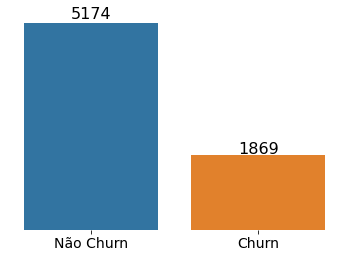

In [ ]:
# Contagem dos valores 'Churn'
fig, ax = plt.subplots()

sns.countplot(data = df1, x = 'Churn')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Não Churn', 'Churn'], fontsize = 14)
ax.set_xlabel(' ')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontsize=16)

Os casos de Churn equivalem a aproximadamente 36% da quantidade total de casos. Isso quer dizer que o dataset está desbalanceado, logo, para melhorar o desempenho dos classificadores de Machine Learning, é necessário coletar mais dados (não aplicável nessa situação) ou utilizar técnicas de balanceamento.

In [ ]:
df1['TotalCharges'].value_counts(ascending=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

`TotalCharges` apresenta valores em brancos `' '`, por isso está sendo indicado como object, logo, é necessário primeiro transformar em valor numérico e em seguida preencher os valores Nan. 

Nessa análise, como hipótese, vamos considerar que os valores ausentes desta variável serão a mediana de `TotalCharges`.



In [ ]:
# Conversão para valores numéricos
df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges, errors='coerce')

df1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# Valores ausentes de TotalCharges antes da limpeza
print('Valores ausentes de "TotalCharges":', df1['TotalCharges'].isna().sum())

# Preenchendo os valores ausentes de TotalCharges com a mediana
df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace = True)

# Valores ausentes de TotalCharges após limpeza
print('Valores ausentes de "TotalCharges" após limpeza:', df1['TotalCharges'].isna().sum())

Valores ausentes de "TotalCharges": 11
Valores ausentes de "TotalCharges" após limpeza: 0


In [ ]:
# Verificando os valores TotalCharges
df1['TotalCharges'].value_counts(ascending = False)

1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df1[['TotalCharges']].describe()

,TotalCharges
count,7043.000000
mean,2281.916928
std,2265.270398
min,18.800000
25%,402.225000
50%,1397.475000
75%,3786.600000
max,8684.800000


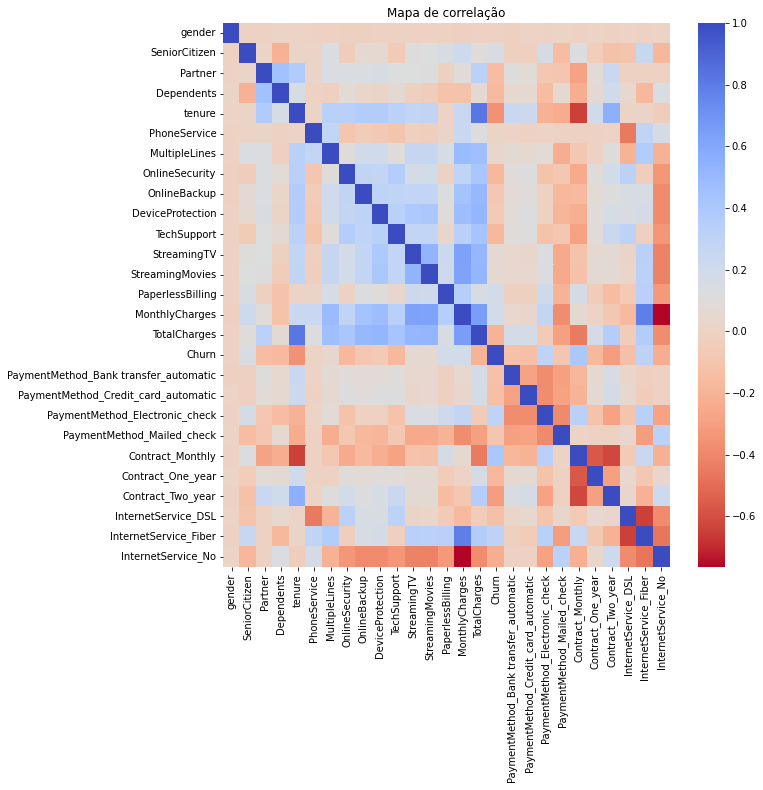

In [ ]:
# Correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10, 10))

corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r')
ax.set_title('Mapa de correlação')
plt.show()

# Visualização Gráfica

Agora todas as features estão mais adequadas, com formato numérico e sem valores ausentes. O mapa de correlação não diz muitas informações, somente que há correlação negativa com `tenure` como esperado de features de caráter inverso e uma leve correlação positiva com `Contract_Monthly`, `PaymentMethod_Electronic_check` e `PaperlessBilling`

Nesse momento, vamos visualizar as características das features e quais classes predominam através de gráficos.

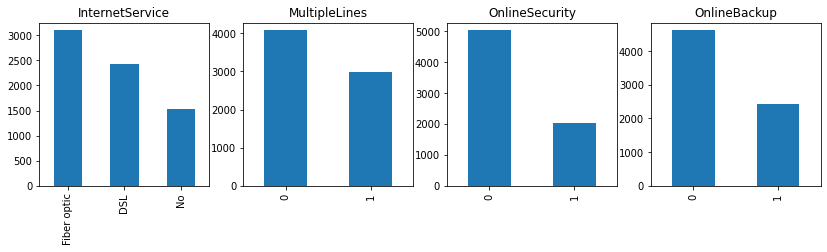

In [ ]:
f, axs = plt.subplots(1, 4,  figsize = (14,3))

df['InternetService'].value_counts().plot(kind='bar', ax = axs[0]);
axs[0].set_title('InternetService')

df1['MultipleLines'].value_counts().plot(kind='bar', ax = axs[1]);
axs[1].set_title('MultipleLines')

df1['OnlineSecurity'].value_counts().plot(kind='bar', ax = axs[2]);
axs[2].set_title('OnlineSecurity')

df1['OnlineBackup'].value_counts().plot(kind='bar', ax = axs[3]);
axs[3].set_title('OnlineBackup')

plt.show()

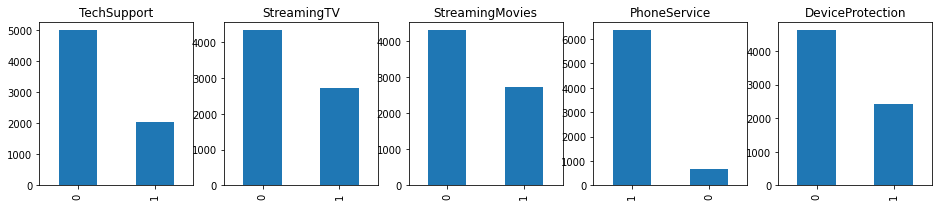

In [ ]:
f, axs = plt.subplots(1, 5,  figsize = (16,3))

df1['TechSupport'].value_counts().plot(kind='bar', ax = axs[0]);
axs[0].set_title('TechSupport')

df1['StreamingTV'].value_counts().plot(kind='bar', ax = axs[1]);
axs[1].set_title('StreamingTV')

df1['StreamingMovies'].value_counts().plot(kind='bar', ax = axs[2]);
axs[2].set_title('StreamingMovies')

df1['PhoneService'].value_counts().plot(kind='bar', ax = axs[3]);
axs[3].set_title('PhoneService')

df1['DeviceProtection'].value_counts().plot(kind='bar', ax = axs[4]);
axs[4].set_title('DeviceProtection')

plt.show()


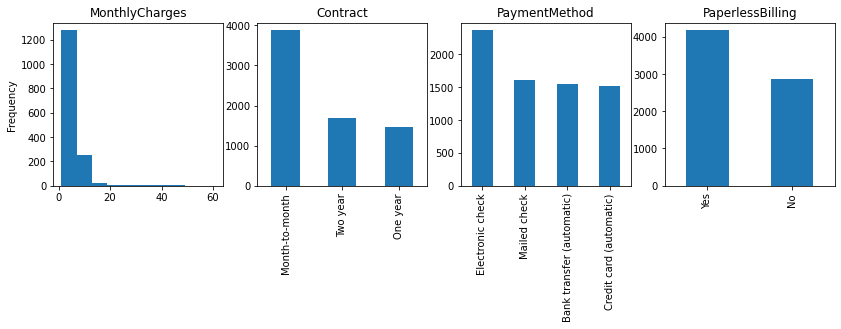

In [ ]:
f, axs = plt.subplots(1, 4,  figsize = (14,3))

df['MonthlyCharges'].value_counts().plot(kind='hist', ax = axs[0]);
axs[0].set_title('MonthlyCharges')

df['Contract'].value_counts().plot(kind='bar', ax = axs[1]);
axs[1].set_title('Contract')

df['PaymentMethod'].value_counts().plot(kind='bar', ax = axs[2]);
axs[2].set_title('PaymentMethod')

df['PaperlessBilling'].value_counts().plot(kind='bar', ax = axs[3]);
axs[3].set_title('PaperlessBilling')

plt.show()

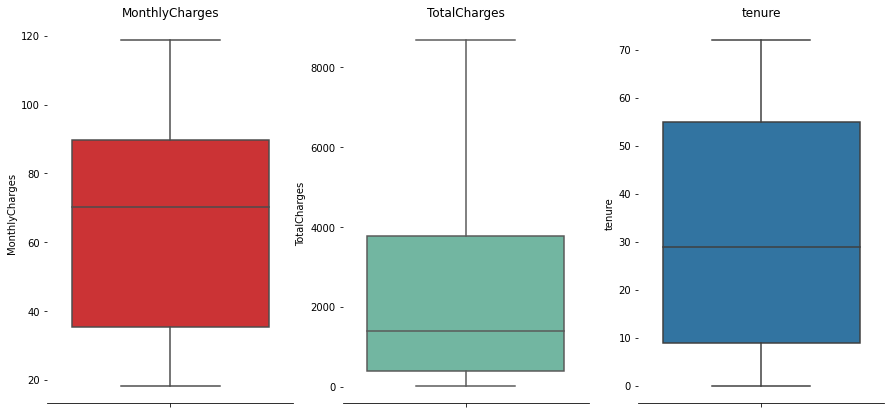

In [ ]:
f, axs = plt.subplots(1, 3, figsize = (15,7))
sns.axes_style("darkgrid")
sns.despine(left=True)

sns.boxplot(y=df.MonthlyCharges, ax = axs[0], palette="Set1")
axs[0].set_title('MonthlyCharges')

sns.boxplot(y=df1.TotalCharges, ax = axs[1], palette="Set2")
axs[1].set_title('TotalCharges')

sns.boxplot(y=df1.tenure, ax = axs[2])
axs[2].set_title('tenure')

plt.show();

In [ ]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

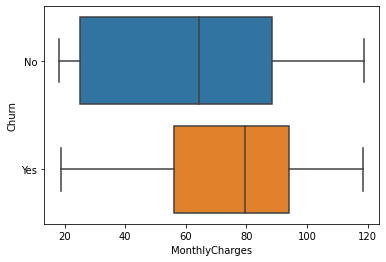

In [ ]:
sns.boxplot(x="MonthlyCharges", y="Churn", data=df);

Os principais serviços usados são: serviço telefonico (PhoneService) e serviço de internet (InternetService), e fibra ótica é a preferência seguido por DSL.

A maioria dos consumidores não utilizam nem proteção de aparelhos, nem suporte técnico e nem stream de tv ou filmes, nem múltiplas linhas. 

O tipo de contrato preferido é o mensal seguido do anual (2 anos) e por ultimo anual. A preferência é da conta vir eletronicamente, sem papel.

Não aparenta haver outliers entre as features numéricas.

Parece haver uma tendência entre os clientes Churn terem dívidas mensais entre 60 e 95 dólares, e uma mediana de 80 dólares, aproximadamente.

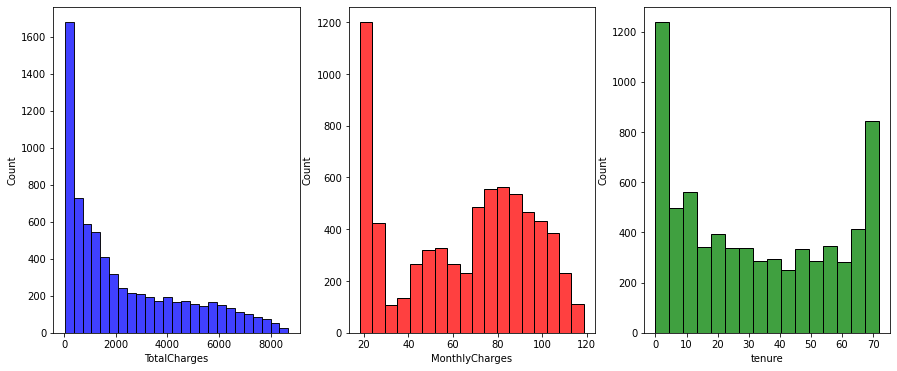

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(data = df1, x = df1['TotalCharges'], ax = axs[0], color = 'b')
sns.histplot(data = df1, x = df1['MonthlyCharges'], ax = axs[1], color = 'r')
sns.histplot(data = df1, x = df1['tenure'], ax = axs[2], color = 'g')

plt.show()

In [ ]:
# Análise exploratória após transformações
df1_summary = eda.df_info(df1)
display_all(df1_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
gender,int64,Numerical,2,"[0, 1]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0
Partner,int64,Numerical,2,"[1, 0]",0,0.0
Dependents,int64,Numerical,2,"[0, 1]",0,0.0
tenure,int64,Numerical,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13]",0,0.0
PhoneService,int64,Numerical,2,"[0, 1]",0,0.0
MultipleLines,int64,Numerical,2,"[0, 1]",0,0.0
OnlineSecurity,int64,Numerical,2,"[0, 1]",0,0.0
OnlineBackup,int64,Numerical,2,"[1, 0]",0,0.0
DeviceProtection,int64,Numerical,2,"[0, 1]",0,0.0


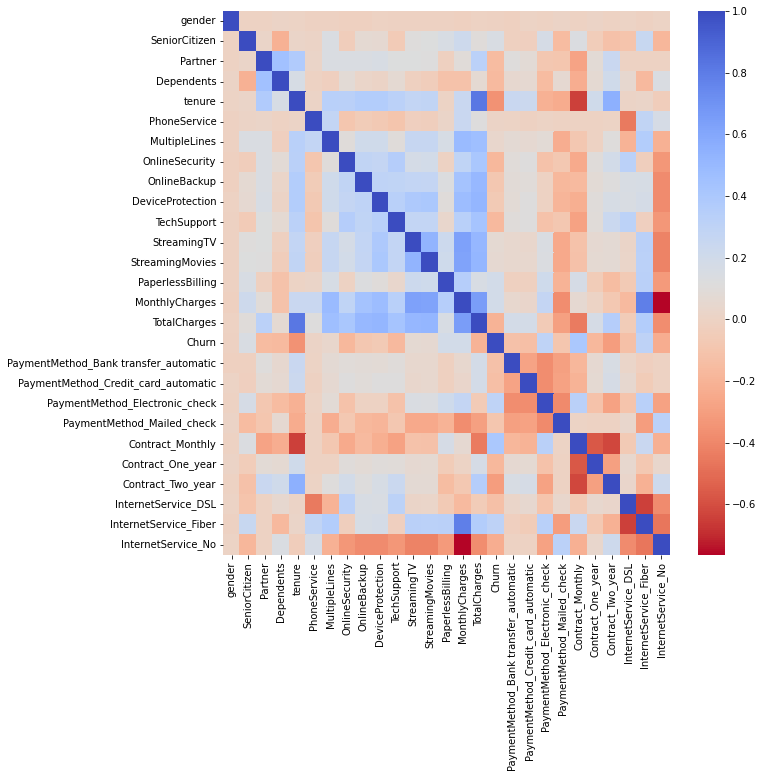

In [ ]:
# Correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10, 10))

corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r')
plt.show()

# **Machine Learning - Classificadores**


<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/2853472.jpg?raw=true" width="30%"></p>
<p align=center>Fonte: Freepik

Como o nosso principal objetivo detectar quais clientes tem maiores chances de cometer Churn, a métrica avaliativa dos modelos será o `Recall`. Ou seja, queremos saber o quanto nossos modelos são sensíveis a clientes desse tipo.

Os algoritmos classificadores serão:

- Regressão Logística 
- XGBClassifier 
- KNeighborsClassifier 
- GaussianNB

A precisão não será a principal métrica pois os clientes Não Churn são clientes que tendem menos a sair, ou seja, são mais fiéis a empresa, logo, um modelo que estime qual cliente dará Churn será de maior importância. 

Por exemplo, caso seja encontrado tais clientes, é possível realizar  ofertas ou brindes para que aumente o seu tempo como cliente da empresa (`tenure`).

Será feita a separação entre feature e target e em seguida a divisão do dataset entre treino x teste x validação. O balanceamento utilizado será RandomUnderSampler, e somente nos dados de treino para não enviesar o resultado. E para a padronização dos dados será usado `RobustScaler`

In [ ]:
# Separação entre features e variável target
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
# 1º Rebalanceamento com RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
# Classificadores
classifiers = {
    'RegressãoLogística':  LogisticRegression(max_iter = 500),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'LightGBM': LGBMClassifier(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

In [ ]:
print('Cross-Validation dataset original:')
for key, classifier in classifiers.items():
  pipeline = make_pipeline(RobustScaler(), classifier)
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(pipeline, X_train, y_train, scoring = 'recall')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% Recall')

print('\n')

print('Cross-Validation dataset rebalanceado:')
for key, classifier in classifiers.items():
  pipeline = make_pipeline(RobustScaler(), classifier)
  classifier.fit(X_res, y_res)
  training_score = cross_val_score(pipeline, X_res, y_res, scoring = 'recall')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% Recall')

Cross-Validation dataset original:
Classificador:  LogisticRegression - 55.00000000000001 % Recall
Classificador:  XGBClassifier - 52.0 % Recall
Classificador:  KNeighborsClassifier - 53.0 % Recall
Classificador:  GaussianNB - 78.0 % Recall
Classificador:  LGBMClassifier - 51.0 % Recall
Classificador:  SVC - 51.0 % Recall
Classificador:  RandomForestClassifier - 48.0 % Recall


Cross-Validation dataset rebalanceado:
Classificador:  LogisticRegression - 80.0 % Recall
Classificador:  XGBClassifier - 81.0 % Recall
Classificador:  KNeighborsClassifier - 79.0 % Recall
Classificador:  GaussianNB - 81.0 % Recall
Classificador:  LGBMClassifier - 78.0 % Recall
Classificador:  SVC - 80.0 % Recall
Classificador:  RandomForestClassifier - 77.0 % Recall


Acima, podemos perceber que a pontuação da Cross-Validation é mais alta após o balanceamento dos dados. De acordo com a pontuação dos classificadores, GaussianNB e XGBClassifier serão os principais escolhidos para esta análise.

# Árvore de decisão - XGBoost classifier


Como estamos lidando com um dataset desbalanceado, além do balanceamento com RandomUnderSampler, é possível também usar o `StratifiedKFold`. Considerando que KFold é um cross-validator que divide o dataset em K divisões/dobras (fold), o StratifiedKFold é uma espécia de KFold melhorada, que garante que cada divisão do dataset terá a mesma proporção de observações.

O dataset de treinamento será padronizado com RobustScaler, que também lida melhor com Outliers.

O XGBoost Classifier é um algoritmo baseado em múlplicas árvores de decisão que juntamente com o gradiente de aprimoramento consegue dar resultados melhores, também chamado de *Ensemble*. 

Porém a otimização dos hiperparâmetros desse modelo pode demorar bastante, então a fim de otimizar o tempo de análise, será utilizado `GridSearchCV` de forma isolada em cada hiperparâmetro e o resultado de cada será agrupado em um modelo para posterior avaliação dos resultados com base no Recall.


In [ ]:
# StratifiedKFold para Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
# Padronização dos  dados
r_scaler = RobustScaler()

r_scaler = RobustScaler().fit(X_train)
X_train = r_scaler.transform(X_train)
X_train = X_res

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, random_state=42)

param_grid = {
 'n_estimators':range(0,500,50),
}

# identificar melhor parâmetro

grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8234317673378075 para {'n_estimators': 50}


In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators= 50, random_state=42)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight': range(1,5,1)
}

# identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.828049217002237 para {'max_depth': 3, 'min_child_weight': 1}


In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators= 50, max_depth= 1, min_child_weight= 1, random_state=42)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8869664429530202 para {'learning_rate': 0.001}


In [ ]:
xgb = XGBClassifier(learning_rate=000.1, n_estimators= 50, max_depth= 1, min_child_weight= 1, random_state=42)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.814076062639821 para {'gamma': 0.0}


In [ ]:
xgb = XGBClassifier(learning_rate=000.1, n_estimators= 50, max_depth= 1, min_child_weight= 1, random_state=42,
                    gamma = 0.0)

param_grid = {
    'scale_pos_weight': range(1,5,1),
    'alpha': range(1,5,1)
}

# identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.967874720357942 para {'alpha': 1, 'scale_pos_weight': 4}


In [ ]:
xgb = XGBClassifier(learning_rate=000.1, n_estimators= 50, max_depth= 1, min_child_weight= 1, random_state=42,
                    gamma = 0.0, scale_pos_weight = 4, alpha = 1)

param_grid = {
 'colsample_bytree ': [0.5, 0.7, 1],
 'subsample': [0.5, 0.7, 1]
}

# identificar melhor parâmetro
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.9692259507829979 para {'colsample_bytree ': 0.5, 'subsample': 1}


              precision    recall  f1-score   support

           0       0.98      0.37      0.54      1035
           1       0.36      0.98      0.53       374

    accuracy                           0.53      1409
   macro avg       0.67      0.68      0.53      1409
weighted avg       0.82      0.53      0.54      1409



AUC: 0.676




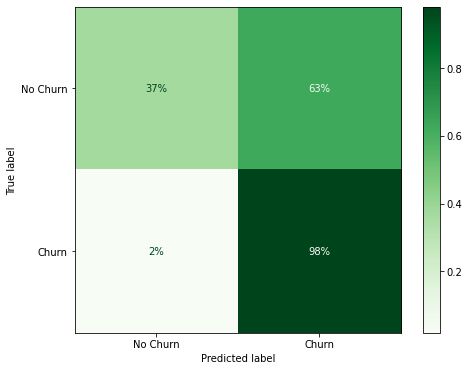

In [ ]:
xgb = XGBClassifier(learning_rate=000.1, n_estimators= 50, max_depth= 1, min_child_weight= 1, random_state=42,
                    gamma = 0.0, scale_pos_weight = 4, alpha = 1,
                    colsample_bytree = 0.5, subsample = 0.5)

xgb.fit(X_res, y_res)
xgb_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, xgb_pred))
print('\n')

# Área sobre a Curva (AUC)
xgb_auc = roc_auc_score(y_test, xgb_pred)
print(f'AUC: {xgb_auc:.3f}')
print('\n')

# Matriz de Confusão
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Greens',
                                        display_labels=('No Churn', 'Churn'),
                                        ax=ax, normalize ='true', values_format= '.0%');

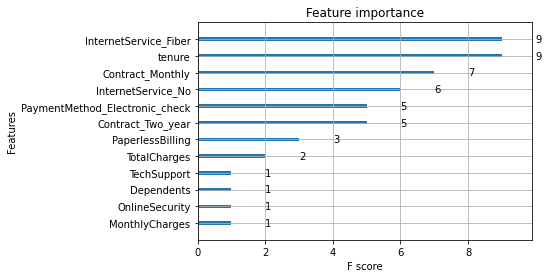

In [ ]:
# Ranking de importância das Features
plot_importance(xgb)
plt.show()

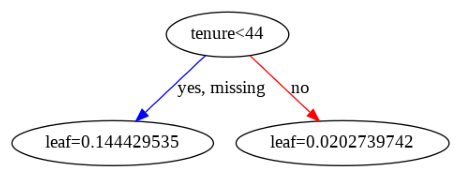

In [ ]:
# Plot da Árvore de Decisão
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fig, ax1 = plt.subplots(figsize = (8,8))
plot_tree(xgb, ax=ax1)
plt.show()

Após a busca de hiperparâmetros ideias para o XGBoost Classifier através de GridSearchCV, obtivemos os seguintes valores:

- gamma: 0.0
- learning_rate: 0.001
- max_depth: 1
- min_child_weight: 1
- n_estimators: 50
- alpha: 1
- scale_pos_weight: 4
- colsample_bytree: 0.5
- subsample: 1


E o resultado final desse modelo foi um Recall de 98%. Os principais hiperparâmetros que aumentaram o score do recall foram: `alpha`, `scale_pos_weight`, `learning_rate`.

 A visulização da árvore de decisão final indica que `tenure` foi a principal feature para a construção da árvore de decisão. Segundo o XGBoost Classifier, as principais features foram: `Contract_Monthly`, `InternetService_Fiber` e `tenure`, em ordem decrescente.


# Gaussian Naive Bayes

Esse classificador probabilístico que demonstrou resultado maior do que os outros antes mesmo do balanceamento, e após, melhorou um pouco. Ele é considerado "Naive" pois é independente (ignora correlações) e é baseado no teorema de probabilidade de Bayes.

In [ ]:
nb = GaussianNB()

nb_params = {'var_smoothing': np.logspace(0, -9, num=100)}

nb_grid_search = GridSearchCV(nb, nb_params, scoring="recall", n_jobs=-1, cv=kfold)

nb_grid_result = nb_grid_search.fit(X_res, y_res)

# ver resultados
print(f"Melhor: {nb_grid_search.best_score_} para {nb_grid_search.best_params_}")

Melhor: 0.8608366890380313 para {'var_smoothing': 8.111308307896873e-08}


              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1035
           1       0.45      0.87      0.60       374

    accuracy                           0.69      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.80      0.69      0.71      1409



AUC: 0.746




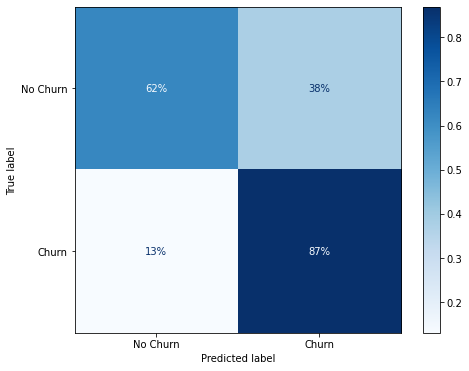

In [ ]:
# Predições
nb = nb_grid_search.best_estimator_
nb.fit(X_res, y_res)
nb_pred = nb.predict(X_test)

# Classification Report
print(classification_report(y_test, nb_pred))
print('\n')

# Área sobre a Curva (AUC)
nb_auc = roc_auc_score(y_test, nb_pred)
print(f'AUC: {nb_auc:.3f}')
print('\n')

# Matriz de Confusão
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, nb_pred, cmap = 'Blues',
                                        display_labels=('No Churn', 'Churn'),
                                        ax=ax, normalize ='true', values_format= '.0%');

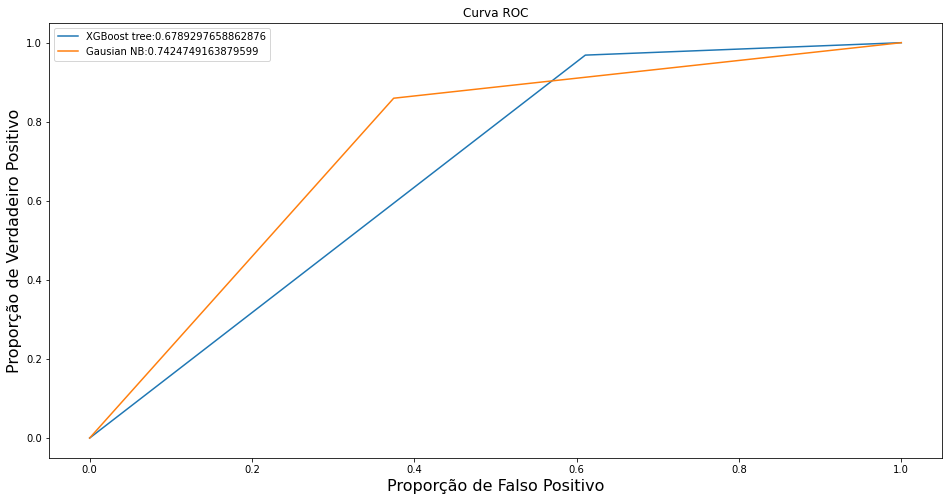

In [ ]:
# Validação Cruzada das predições
nbb_pred = cross_val_predict(nb, X_res, y_res, cv=kfold)

xgbb_pred = cross_val_predict(xgb, X_res, y_res, cv=kfold)

# Visualização da Curva ROC
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_res, xgbb_pred)
nb_fpr, nb_tpr, nb_threshold = roc_curve(y_res, nbb_pred)

def plot_roc_curve(tree_fpr, tree_tpr, nb_fpr, nb_tpr):
  plt.figure(figsize=(16,8))
  plt.title('Curva ROC')
  plt.plot(tree_fpr, tree_tpr, label = f'XGBoost tree:{roc_auc_score(y_res, xgbb_pred)}')
  plt.plot(nb_fpr, nb_tpr, label =f'Gausian NB:{roc_auc_score(y_res, nbb_pred)}')
  plt.xlabel("Proporção de Falso Positivo", fontsize=16)
  plt.ylabel("Proporção de Verdadeiro Positivo", fontsize=16)
  plt.legend()

plot_roc_curve(tree_fpr, tree_tpr,
               nb_fpr, nb_tpr)

plt.show()

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Plot das curvas de aprendizados

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,10), sharey=True)
  if ylim is not None:
    plt.ylim(*ylim)

    # 1 Estimator

    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax1.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax1.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)
    
    ax1.set_title('Curva de aprendizado - XGBoost Classifier')
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend()
    
    # 2 Estimator

    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax2.fill_between(train_sizes, train_scores_mean - test_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color="#ff9124")
    ax2.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score', color="#2492ff",)
    
    ax2.set_title('Curva de aprendizado - Gausian NB')
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend()


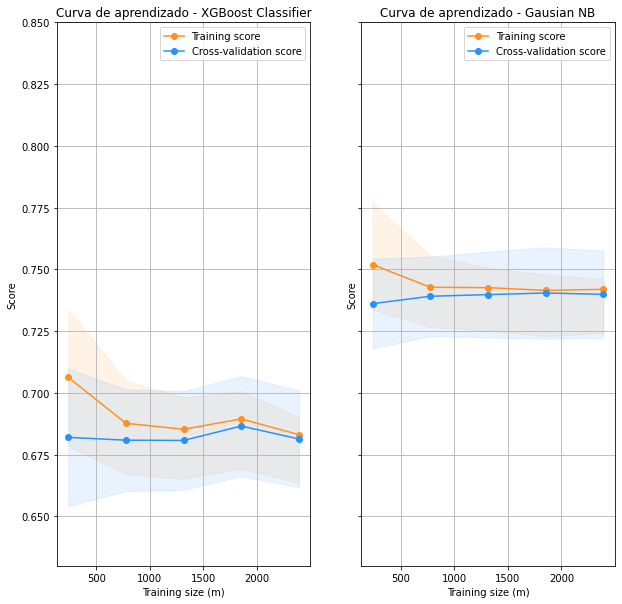

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(xgb, nb, X_res, y_res, (0.63, 0.85), cv=cv, n_jobs=4);

# Métricas

As métricas dos modelos classificatórios incluém:

###Matrizes de confusão

* TP - Positivos Verdadeiros - Previsão positiva e verdadeira. Um cliente churn é detectado como churn (corretamente)


* TN - Negativos verdadeiros - Previsão negativa e verdadeira. Um cliente não churn é detectado como não churn (corretamente)


* FP - Falsos positivos - Previsão positiva e falsa. Um cliente não churn é detectado como churn (incorretamente)


* FN - Falsos negativos - Previsão negativa e falsa. Um cliente  churn é detectado como não churn (incorretamente)

###Relatório de classificação 

Já no relatório de classificação é encontrado:

* Precision (P) - Porcentagem de classificações corretas (P = TP/TP+FP)

* Recall (R) - Porcentagem de classificações corretas em relação aos falsos negativos (R = TP/TP+FN). Representa a sensibilidade da classificação e será a principal métrica dessa análise.

* F1-Score = É a média harmônica entre Precision e Recall (F1 = 2(P*R)/(P+R)

### ROC

A curva característica de funcionamento do receptor ou Curva ROC (*receiver operating characteristic curve*), avalia a taxa de verdadeiros positivos em relação aos falsos positivos. Dessa medida por ser criada a AUC (*Area Under the Curve*) que quanto maior o valor, melhor será a classificação.

Nos exemplos acima, a AUC do GausianNB foi ligeiramente melhor(0.74) do que a AUC do XGBoost Classifier (0.68).

### Curva de Aprendizado (Learning Curve)

A curva de aprendizado compara as pontuações entre o treino e teste através de Cross-Validation. É útil para se visualizar até que ponto o tamanho de treinamento pode ser ideal e também verificar se existe underfit (bias) - o classificador não aprende sobre padrões dos dados, ou overfit (variance)- o classificador "decora" as respostas e não generaliza.

Na curva acima, ambos os classificadores apresentam resultado semelhantes e satisfatórios.

# **Conclusão**


 <p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/4194930.jpg?raw=true" width="40%"></p>
<p align=center>Fonte: Freepik



O Churn Rate é uma métrica que avalia a rotatividade dos clientes de uma empresa, logo, quanto maior, pior será para a empresa. A fim de se observar quais clientes tendem a deixar a empresa, é possível utilizar algoritmos juntamente com análise de dados para estimar quais são esses prováveis clientes.

A análise exploratória revelou que os serviços mais procurados da empresa incluem serviços de telefone e internet. A maioria dos clientes preferem também que suas dívidas sejam enviadas eletronicamente, sem papel físico. Parece haver uma tendência entre os clientes Churn terem dívidas mensais entre 60 e 95 dólares, e uma mediana de 80 dólares, aproximadamente.

Foi preciso limpar o dataset antes de aplicar os algoritmos. Primeiro, todas as features categóricas foram transformadas em numéricas. Dados ausentes foram convertidos na mediana da feature. O balanceamento utilizado da feature alvo foi através RandomUnderSampling. 

Dentre os quatro classificadores, o  XGBoost Classifier (98%), seguido do GaussianNB (87%), tiveram melhor performance da métrica Recall - sensibilidade/capacidade de detectar possíveis clientes Churn.
Para tais prováveis clientes que caíram nessa classificação, é possível investigar mais detalhes sobre eles e dessa maneira fazer ações para prolongar o tempo de vida dele na empresa, como sugerindo ofertas melhores ou brindes, como por exemplo, dois meses de assinatura grátis.

Como um case de negócio, a aplicação desse modelo classificatório pode gerar um CLV (Customer Lifetime Value) maior. Ou seja, valor que o cliente retornará ao longo do tempo será maior, e poderá ser possível reduzir despesas para conseguir clientes novos (CAC).

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Churn%20Project/460736-PFPSO8-15.jpg?raw=true" width="30%"></p>
<p align=center>Fonte: Freepik

Referencias:

<a href='https://www.freepik.com/vectors/talk-balloon'>Talk balloon vector created by freepik - www.freepik.com</a>

<a href="https://www.freepik.com/free-vector/quitting-job-concept-illustration_9558391.htm#query=leaving&position=0&from_view=search">Image by storyset</a> on Freepik

<a href="https://www.freepik.com/free-vector/justice-two-hands-balance_1011196.htm#query=balance&position=12&from_view=search">Image by macrovector</a> on Freepik

<a href="https://www.freepik.com/free-vector/floating-books-cartoon-vector-icon-illustration-object-education-icon-concept-isolated-premium-vector-flat-cartoon-style_21948365.htm#query=dicionario&position=19&from_view=search">Image by catalyststuff</a> on Freepik

Image by <a href="https://www.freepik.com/free-vector/cancelled-events-announcement-illustration_8918481.htm#page=2&query=cancel&position=7&from_view=search">Freepik</a>

<a href="https://www.freepik.com/free-vector/filter-concept-illustration_5464420.htm#query=classifier&position=15&from_view=search">Image by storyset</a> on Freepik